In [1]:
import os
import time
import random
import math
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from PIL import Image
from IPython.display import clear_output

import ai2thor
import ai2thor_colab
from ai2thor_colab import plot_frames
from ai2thor.controller import Controller

from ai2thor.platform import CloudRendering
controller = Controller(platform=CloudRendering)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

In [3]:
from network import DQN
from utils import to_torchdim, frame2tensor, plot_durations, encode_feedback

In [4]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

## Set Environment

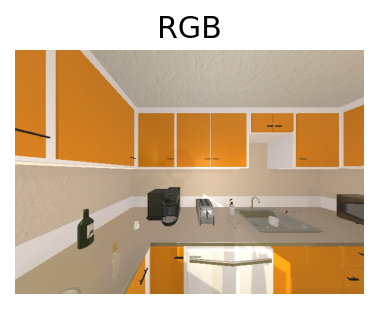

In [5]:
floor_index = random.randint(0, 30)
floor_index = 20

controller = Controller(
    agentMode = "default", # arm
    visibilityDistance = 1.5,
    scene = f"FloorPlan{floor_index}",

    # step sizes
    snapToGrid = True,
    gridSize = 0.25,
    rotateStepDegrees = 90,

    # image modalities
    renderInstanceSegmentation = False,
    renderDepthImage = False,
    renderSemanticSegmentation = False,
    renderNormalsImage = False,
    
    # camera properties
    width = 600,
    height = 420,
    fieldOfView = 120,
)

plot_frames(controller.last_event)

In [6]:
instructions = ["find light switch", "locate power switch", "seek light control", 
                "discover light control", "identify switch light", "pinpoint light switch"]

## Set Configs

In [7]:
is_cuda = torch.cuda.is_available()

if is_cuda: device = torch.device('cuda')
else: device = torch.device('cpu')

In [8]:
action_space = ["MoveAhead", "MoveLeft", "MoveRight", "MoveBack", "RotateLeft", "RotateRight"]

## Load Word2Vec

In [10]:
from gensim.models import Word2Vec, KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
glove_input_file = 'weights/glove.6B.100d.txt'
word2vec_output_file = 'weights/glove.6B.100d.txt.word2vec'

glove2word2vec(glove_input_file, word2vec_output_file)
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [ ]:
pretrained_embeddings = torch.FloatTensor(word2vec_model.vectors) # shape 400kx100

## Set Replay Memory

In [ ]:
class ReplayBuffer(object):
    """Fixed-size buffer to store experience tuples."""
    
    def __init__(self, action_size, buffer_size, batch_size, seed):
        pass
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to buffer."""
        
        pass
    
    def sample(self):
        
        pass
    
    def __len__(self):
        """Return the current size of internal memory."""
        
        pass

## Build Model

In [9]:
class VisualModel(nn.Module):
    
    def __init__(self):
        
        super(VisualModel, self).__init__()
        self.cnn = models.resnet18(pretrained=True)
        self.cnn.fc = nn.Identity()
        
    def forward(self, x):
        
        return self.cnn(x)
    
    
class TextModel(nn.Module):
    
    def __init__(self, pretrained_embedding, hidden_dim):
        
        super(TextModel, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(pretrained_embedding, freeze=True)
        self.rnn = nn.LSTM(pretrained_embedding.shape[1], hidden_dim)
        
    def forward(self, x):
        
        embedded = self.embedding(x)
        output, _ = self.rnn(embedded)
        return output[..., -1]

In [ ]:
class MultimodalDQN(nn.Module):
    
    def __init__(self, visual_model, text_model, action_space):
        
        super(MultimodalDQN, self).__init__()
        self.visual_model = visual_model
        self.text_model = text_model
        self.fc1 = nn.Linear(515, 4120)  
        self.fc2 = nn.Linear(4120, action_space)
        
    def forward(self, visual_input, text_input):
        
        visual_features = self.visual_model(visual_input)
        text_features = self.text_model(text_input)
        
        combined_features = torch.cat((visual_features, text_features), dim=1)
        combined_features = self.fc1(combined_features)
        q_values = self.fc2(combined_features)
        
        return q_values

## Build Agent

In [ ]:
class DQNAgent():
    """The agent interacting with and learning from the environment."""
    
    def __init__(self, screen_width, screen_height, action_size, seed):
        pass
    
    def memorize(self, state, action, reward, next_state, done):
        """Save experience in replay buffer."""
        pass
    
    def preprocess(self, state, screen_width, screen_height):
        """Preprocess input frame before passing into agent."""
        pass
    
    def act(self, state, epsilon=0.):
        """Returns actions for given state as per current policy."""
        pass
    
    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples."""
        pass
    
    def soft_update(self, target_net, dqn_net, tau):
        """Soft update target network parameters."""
        pass
        
    def watch(self, controller, num_episodes=10):
        """Watch trained agent."""
        pass

## Train Agent

In [ ]:
def train_network(num_episodes, max_time):
    pass

## Check The Result!

---